In [36]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

I am working on the content presented in **Lexographic index equations.docx** script, which requires for some equations to be turned into python code.

In [2]:
def A(lista):
    A_v = []
    for i in range(4):
        if lista[i] =="1" or lista[i] ==1:
            A_v.append(i+1)
    return A_v

def B(lista):
    B_v = []
    for i in range(4):
        counter = i
        if lista[i] != 0 and lista[i]!="0": 
            while counter <=4:
                if lista[counter] =="1" or lista[counter] ==1:
                    counter +=1
                    if counter <4:
                        if lista[counter] =="1" or lista[counter] ==1:
                            B_v.append(counter)
                            break          
                        else:
                            counter +=1
                            
                            if counter <4:
                                if lista[counter] =="1" or lista[counter] ==1:
                                    B_v.append(counter)
                                    break
                                else:
                                    counter +=1
                                
                                    if counter <4:
                                        if lista[counter] =="1" or lista[counter] ==1:
                                            B_v.append(counter)
                                            break
                                        else:
                                            B_v.append(counter+1)
                                            break
                                    else:
                                        B_v.append(counter)
                                        break
                            else:
                                B_v.append(counter)
                                break
                    else:        
                        B_v.append(counter)
                        break
                        
    return B_v


def C(lista):
    C_v = []
    for i in range(4):
        counter = i       
        if lista[i] =="1" or lista[i] ==1:
            while counter >=-1:
                if lista[counter] =="1" or lista[counter] ==1:
                    counter -= 1
                    if counter >=0:
                        if lista[counter] =="1" or lista[counter] ==1:
                            C_v.append(counter+2)
                            break          
                        else:
                            counter -=1                            
                            if counter >=0:
                                if lista[counter] =="1" or lista[counter] ==1:
                                    C_v.append(counter+2)
                                    lista[counter+1], lista[i] = lista[i], lista[counter+1] 
                                    break
                                else:
                                    counter -=1
                                
                                    if counter >=0:
                                        if lista[counter] =="1" or lista[counter] ==1:
                                            C_v.append(counter+2)
                                            break
                                        else:
                                            lista[counter+1], lista[i] = lista[i], lista[counter+1] 
                                            C_v.append(counter+1)
                                        break
                                    else:                                                   #Exception, here you need to put them first!
                                        lista[counter+1], lista[i] = lista[i], lista[counter+1] 
                                        C_v.append(counter+2)
                                        break
                            else:
                                lista[counter+1], lista[i] = lista[i], lista[counter+1] 
                                C_v.append(counter+2)
                                break
                    else:
                        lista[counter+1], lista[i] = lista[i], lista[counter+1] 
                        C_v.append(counter+2)
                        
                        break
#    N = (4-len(C_v))*[0]                          #to add all the zero at the end (not necessary, ask Bison)
#    C_v = C_v + N
    return C_v

In [3]:
#Some assert to check if it works
test =  ["0","0","1","0"]
test2 = ["1","0","0","0"]
test3 = ["0","1","1","1"]
test4 = ["1","0","1","1"]
test5 = ["1","1","1","1"]

A(test2)

[1]

In [4]:
B(test2)

[4]

In [5]:
B(test4)

[2, 3, 4]

In [6]:
C(test)

[1]

In [7]:
#After I define functions to compute A, B, C, I use all of them together.

def parameters(data):
    with open(data) as file:
        heading = next(file)
        reader = csv.reader(file)
        A_v = list()
        B_v = list()
        C_v = list()
        data = []                
            
        for row in reader:
            data.append(row)
            A_r = A(row)
            A_v.append(A_r)
            B_r = B(row)
            B_v.append(B_r)
            C_r = C(row)
            C_v.append(C_r)               
    return A_v, B_v, C_v, data
            

In [8]:
#Some sequences to work on.
test_data = "data for test.csv"

ABC = parameters(test_data)
A_score, B_score, C_score, data = ABC

In [9]:
#We need to define a function to obtain the factorial of a number.
def factorial(n):
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

In [10]:
def first_index(A,B,C):
    T = 4
    index_1 = []
    for a in A:        #A,B,C always have the same length.
        if a !=[]:
            ind = 1   #1 + T!/e_0!
            pos = A.index(a)      #unlike B and C, A is always different meaning positions aren't ambiguous
            ind -= factorial(B[pos][len(a)-1])/(factorial(C[pos][len(a)-1])*factorial(B[pos][len(a)-1]-C[pos][len(a)-1]))
            diff = 0
            for i in range(len(a)):
                ind += factorial(T)/(factorial(i+1)*factorial(4-(i+1)))
                diff = factorial(B[pos][i])/(factorial(C[pos][i])*factorial(B[pos][i]-C[pos][i])) - factorial(A[pos][i])/(factorial(C[pos][i])*factorial(A[pos][i]-C[pos][i]))
                
                ind += diff
        else:
            ind = 0
        index_1.append(ind)
    return index_1

In [11]:
first_index = first_index(A_score, B_score, C_score)

In [12]:
def second_index(A,B,C):
    T = 4
    index_2 = []
    for a in A:
        if a !=[]:
            pos = A.index(a)
            ind = 1+ (factorial(T)/(factorial(len(a))*factorial(4-len(a)))) - (factorial(B[pos][len(a)-1])/(factorial(C[pos][len(a)-1])*factorial(B[pos][len(a)-1]-C[pos][len(a)-1])))
            for i in range(len(a)):
                diff = factorial(B[pos][i])/(factorial(C[pos][i])*factorial(B[pos][i]-C[pos][i])) - factorial(A[pos][i])/(factorial(C[pos][i])*factorial(A[pos][i]-C[pos][i]))
                ind += diff
            
            ind /= (factorial(T)/(factorial(len(a))*factorial(4-len(a))))    
            ind += 2*len(a)-1
            ind = round(ind,3)

        else:
            ind = 0
        index_2.append(ind)
    return index_2      

In [13]:
second_index = second_index(A_score, B_score, C_score)
#Here and by my on-hand calculations, the last index score is equal to 8.0 (all the values are approximated) ask the professor.

In [14]:
def third_index(A,B,C):
    ratios = []
    T = 4
    index_3a = []
    index_3b = []
    for a in A:
        index_3a.append(len(a)/4)
        pos = A.index(a)
        if a!=[]:
            ind = 1+ (factorial(T)/(factorial(len(a))*factorial(4-len(a)))) - (factorial(B[pos][len(a)-1])/(factorial(C[pos][len(a)-1])*factorial(B[pos][len(a)-1]-C[pos][len(a)-1])))
            for i in range(len(a)):
                diff = factorial(B[pos][i])/(factorial(C[pos][i])*factorial(B[pos][i]-C[pos][i])) - factorial(A[pos][i])/(factorial(C[pos][i])*factorial(A[pos][i]-C[pos][i]))
                ind += diff
            
            ind /= (factorial(T)/(factorial(len(a))*factorial(4-len(a))))    
            ind *= factorial(T)/(factorial(len(a))*factorial(4-len(a))) / (factorial(T)/(factorial(len(a))*factorial(4-len(a)))+1)
            ind = round(ind,3)
        else:
            ind = factorial(T)/(factorial(len(a))*factorial(4-len(a))) / (factorial(T)/(factorial(len(a))*factorial(4-len(a)))+1)
        index_3b.append(ind)        
        
    return index_3a, index_3b

In [15]:
third_indexA, third_indexB = third_index(A_score, B_score, C_score)

In [ ]:
#For better visualization each sequence is turned from a list of characters to a string of length 4.
sequences_r = []
for i in data:
    j = "".join(i)
    sequences_r.append(j)

In [29]:
#Create a csv containing the sequences, A, B, C, index_1, index_2, index_3a, index_3b
index = pd.DataFrame({'Data':sequences_r, "A":A_score, "B": B_score, "C": C_score, "Index_1": first_index,
                     "Index_2": second_index, "Index_3A":third_indexA, "Index_3B":third_indexB})


index.to_csv("index.csv", header=True)

In [30]:
index

,Data,A,B,C,Index_1,Index_2,Index_3A,Index_3B
0,0000,[],[],[],0.0,0.000,0.00,0.500
1,0100,[4],[4],[1],1.0,1.250,0.25,0.200
2,1000,[3],[4],[1],2.0,1.500,0.25,0.400
3,1000,[2],[4],[1],3.0,1.750,0.25,0.600
4,1000,[1],[4],[1],4.0,2.000,0.25,0.800
5,1001,"[3, 4]","[3, 4]","[1, 2]",5.0,3.167,0.50,0.143
6,1001,"[2, 4]","[3, 4]","[1, 2]",6.0,3.333,0.50,0.286
7,1001,"[1, 4]","[3, 4]","[1, 2]",7.0,3.500,0.50,0.429
8,1100,"[2, 3]","[2, 4]","[1, 2]",8.0,3.667,0.50,0.571
9,1100,"[1, 3]","[2, 4]","[1, 2]",9.0,3.833,0.50,0.714


In [ ]:
## Simple plot
sns.scatterplot(data=index, x=index.Index_3B, y=index.Index_3A)
plt.title("Spatial distribution of sequences")
plt.xlabel("d''")
plt.ylabel("d'")

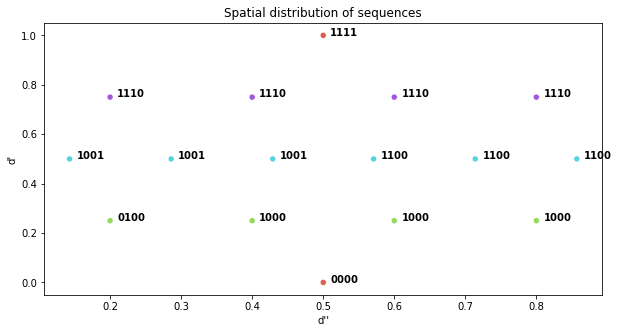

In [66]:
#Plot with labels
plt.figure(figsize=(10,5))
p1 = sns.scatterplot(data=index, x=index.Index_3B, y=index.Index_3A,
                    legend=False, hue=index.Index_3A, palette="hls")

plt.title("Spatial distribution of sequences")
plt.xlabel("d''")
plt.ylabel("d'")

for line in range(0,index.shape[0]):          #Dataset's length
     p1.text(index.Index_3B[line]+0.01, index.Index_3A[line], 
     index.Data[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

plt.savefig("Index visualization.png", transparent=True)